# INSEE's premises

In [2]:
import geopandas
from geopy.geocoders import Nominatim
import re
import pandas as pd

#%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib, descartes

from pynsee.sirene import *
from pynsee.localdata import *

In [3]:
# Subscribe to api.insee.fr and get your credentials!
# Beware : any change to the keys should be tested after having cleared the cache
# Please do : from pynsee.utils import *; clear_all_cache()
# Advice : add the following lines to 'pynsee_api_credentials.py' file in your HOME directory
# to avoid running them manually
import os
os.environ['insee_key'] = "my_key"
os.environ['insee_secret'] = "my_secret_key"

In [5]:

variable = ["denominationUniteLegale", 'sigleUniteLegale', 'categorieJuridiqueUniteLegale']

insee_pattern = "INSTITUT NATIONAL DE LA STATISTIQUE ET DES ETUDES ECONOMIQUES"
pattern = [insee_pattern, 'INSEE', '7120']
# 7120 : Service central d'un ministère

data = search_sirene(variable = variable, pattern = pattern, kind="siret")

# remove overseas department premises
data = data[ ~(data['codePostalEtablissement'].str.contains('^97'))]
data = data.reset_index(drop=True)


Getting legal entities: 100%|██████████| 1/1 [00:00<00:00,  1.19it/s]!!! This function may return personal data, please check and
 comply with the legal framework relating to personal data protection !!!



In [6]:
df_loc = get_location(data)

df = data.merge(df_loc, on = 'siret', how = 'left')

gdf = geopandas.GeoDataFrame(df, geometry=geopandas.points_from_xy(df.longitude, df.latitude))
gdf = gdf.reset_index(drop=True)

for i in range(len(gdf.index)):
    gdf.loc[i,'name'] = str(i+1) + ' - ' + gdf.loc[i,'enseigne1Etablissement']
    gdf.loc[i,'i'] = i + 1

mapdep = get_map('departements')

Getting location: 100%|██████████| 44/44 [00:28<00:00,  1.57it/s]
!!! Geographic data come from https://france-geojson.gregoiredavid.fr/,
It has been made in 2018 from INSEE and IGN data !!!


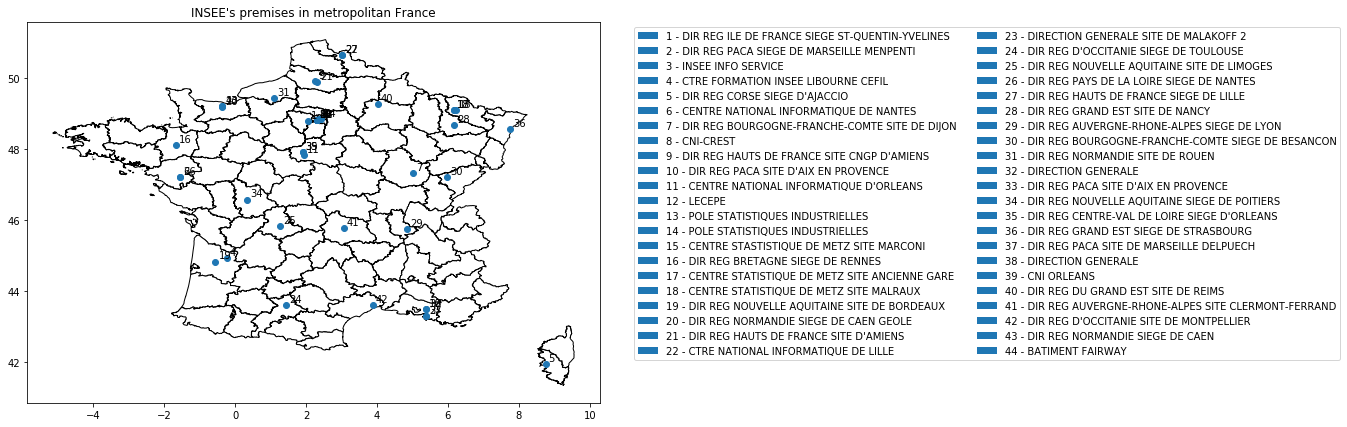

In [8]:
# plot
ax = mapdep.plot(color='white', edgecolor='black', figsize = (15,7))

gdf.plot(ax=ax)
plt.title("INSEE's premises in metropolitan France")
for x, y, i, label in zip(gdf.geometry.x, gdf.geometry.y, gdf.i, gdf.name):
    ax.annotate(int(i), xy=(x, y), xytext=(3, 3), textcoords="offset points")

legends = [mpatches.Patch(label=f) for f in gdf.name]
plt.legend(handles=legends, ncol=2, bbox_to_anchor=(1.05, 1))

